# Exploring features based on the neuroimaging literature

This notebook looks at the network and autoregressive features in two subsets of regions based on results in the neuroimaging literature. First the features for the regions associated with the subgenual Anterior Cingulate Cortex (sgACC) are explored. The sgACC has been associated with depression in by a range of structural and functional settings. In the Glasser atlas the sg-ACC is covered by $6$ nodes, which are the right and left a24, 25, and s25 regions. 

## File notes

Opted to do data driven dimensionality reduction for the initial EMBC paper due to time constraints. Looking back at the TSNE plots, while the features from these $6$ regions are highly colinear (from the pair plots), with appropriate dimensionality reduction they could be useful for classification.  


In [28]:
import sys
sys.path.append('..') #workaround to deal with directory issues in notebooks

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

from src.features import load_features,binary_pca_plot



In [18]:
# import variables
data_dir='../data/'
class_labels,two_class_labels,pos_str,neg_str,clus_co,ar_array,num_regions,num_subjs=load_features(data_dir)

print(class_labels)


[1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 3 1 2 2 3 3 3 2 3 3 3 3 2 2 3 3 1 1 2 3 2 1
 3 3 1 2 1 2 2 1 2 3 3 1 1 3 2 1 3 3 2 1 1 3 1 2 3 3 3 2 1 2 2 3 1 1 2 2 2
 3 2 1 1 2 2 2 1 1 2 2 1 3 3 2 3 2 3 1 3 2 1 2 2 1 2 1 1 3 1 1 1 2 3 3 3 2
 3 1 2 1 2 3 1 2 1 2 1 3 1 3 3 2 1 3 1 3 3 1 1 3 1 2 1 3 2 1 1 2 1 2 3 3 3
 2 2 3 1 2 3 2 1 2 3 1 3 3 3 3 3 2 3 2 3 3 3 3 2 2 2 3 3 3 2 3 3 3 3 3 2 1
 2 3 1 2 3 2 2 2 3 3 3 2 3 2 2]


# sgACC features

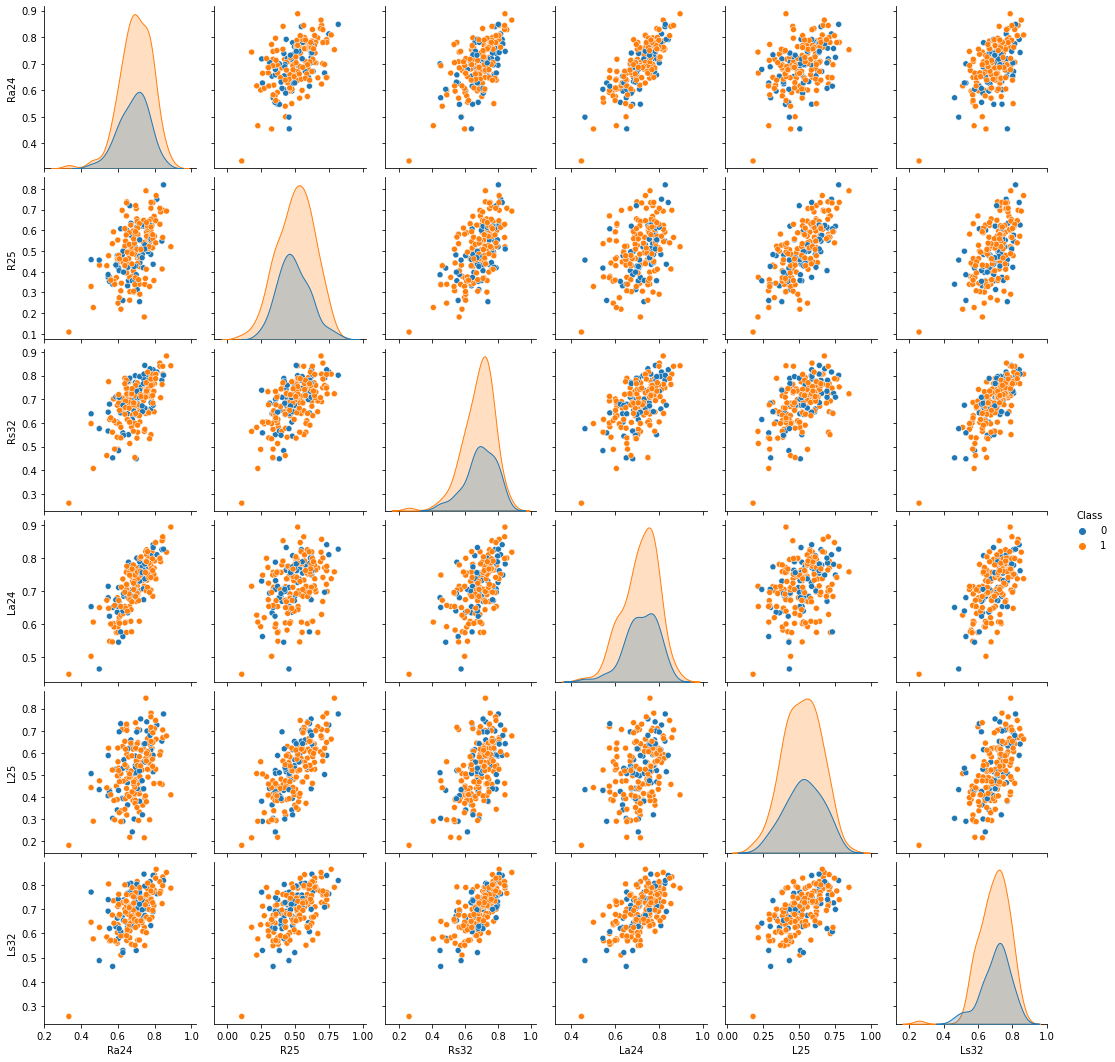

In [23]:
nodes_of_interest={'Ra24':61,'R25':164,'Rs32':165,'La24':241,'L25':344,'Ls32':345} # dictionary with sgACC node names and parcel numbers in the Glasser Atlas

num_noi=len(nodes_of_interest)
noi_features=np.zeros((num_noi,num_subjs))
noi_features=ar_array[[val-1 for val in nodes_of_interest.values()],:].transpose()
noi_dataframe=pd.DataFrame(noi_features,columns=[val for val in nodes_of_interest.keys()])
noi_dataframe['Class']=two_class_labels
sns.pairplot(noi_dataframe,hue='Class') #do some pairplots while we still have a relatively low dimensional feature

Based on the pairplot, outside of a few outliers these features are highly co-linear and I would expect we'd need to do some kind of data transform to get meaningful information. Of course that's not too unexpected because these timeseries are for regions that are right next to each other in the brain. Let's check that the same is true for the network features. 

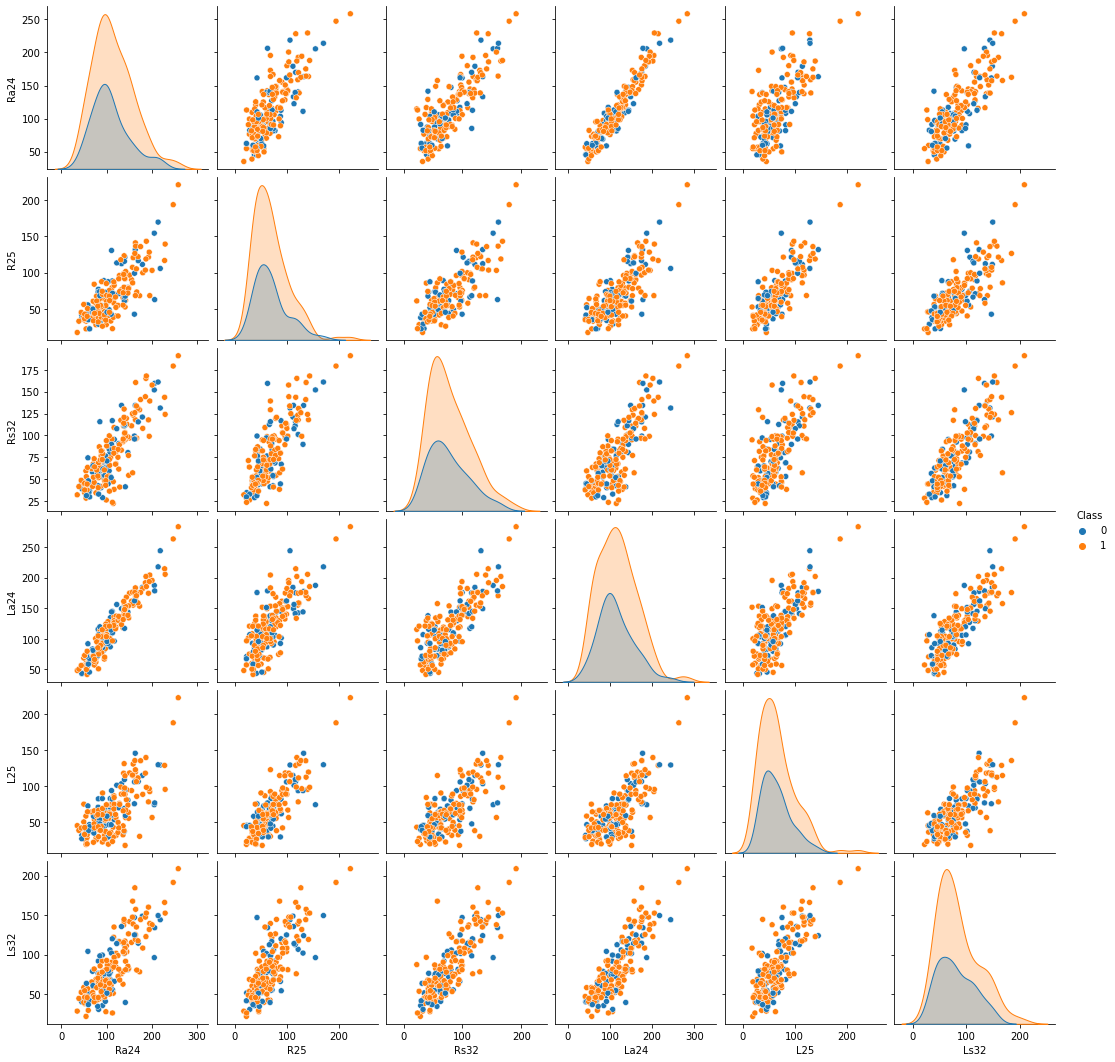

In [24]:
#Positive Strength pairplot

noi_feat_pos=np.zeros((num_noi,num_subjs))
noi_feat_pos=pos_str[[val-1 for val in nodes_of_interest.values()],:].transpose()
noi_df_pos=pd.DataFrame(noi_feat_pos,columns=[val for val in nodes_of_interest.keys()])
noi_df_pos['Class']=two_class_labels
sns.pairplot(noi_df_pos,hue='Class')

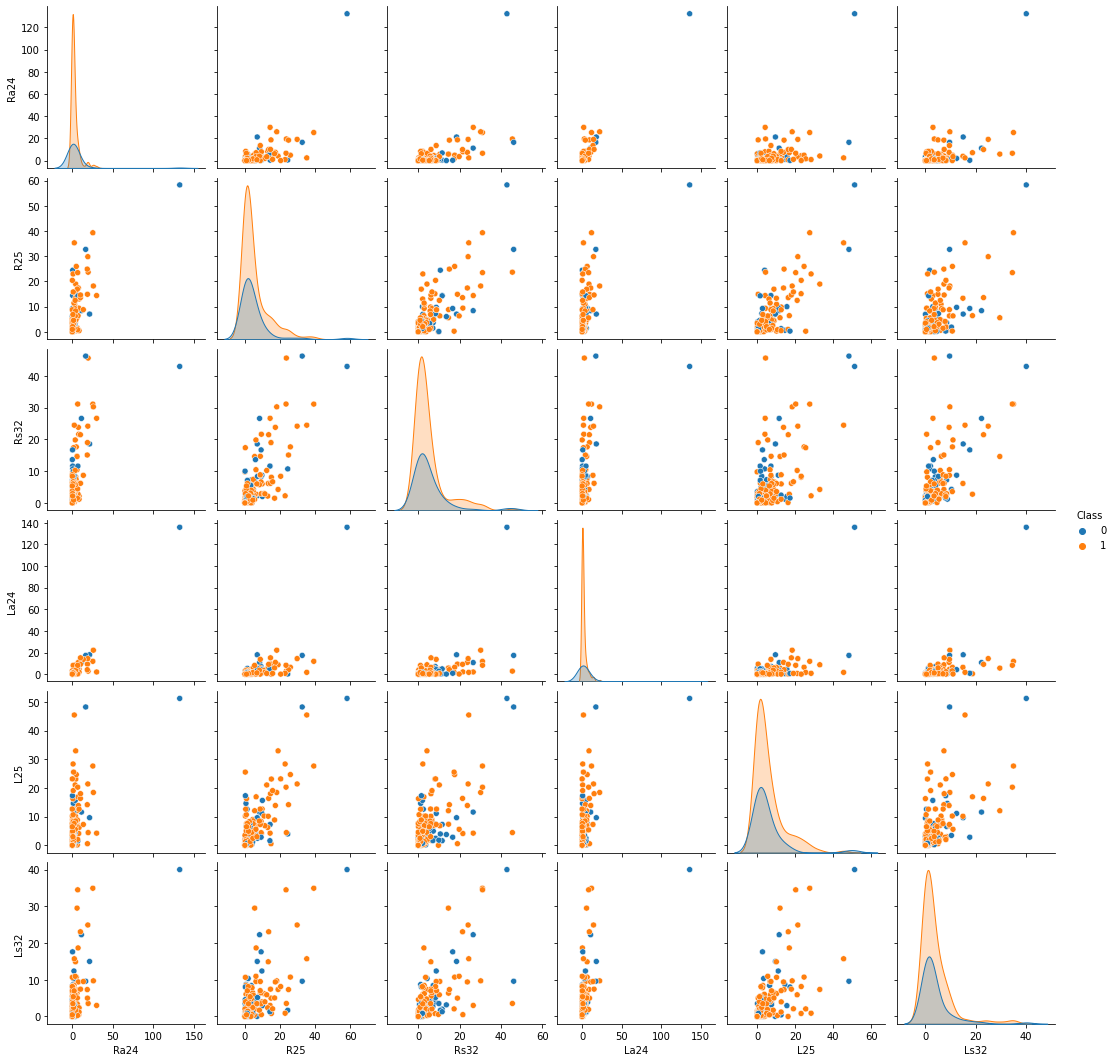

In [27]:
# Negative Strength Features
noi_feat_neg=np.zeros((num_noi,num_subjs))
noi_feat_neg=neg_str[[val-1 for val in nodes_of_interest.values()],:].transpose()
noi_df_neg=pd.DataFrame(noi_feat_neg,columns=[val for val in nodes_of_interest.keys()])
noi_df_neg['Class']=two_class_labels
sns.pairplot(noi_df_neg,hue='Class')

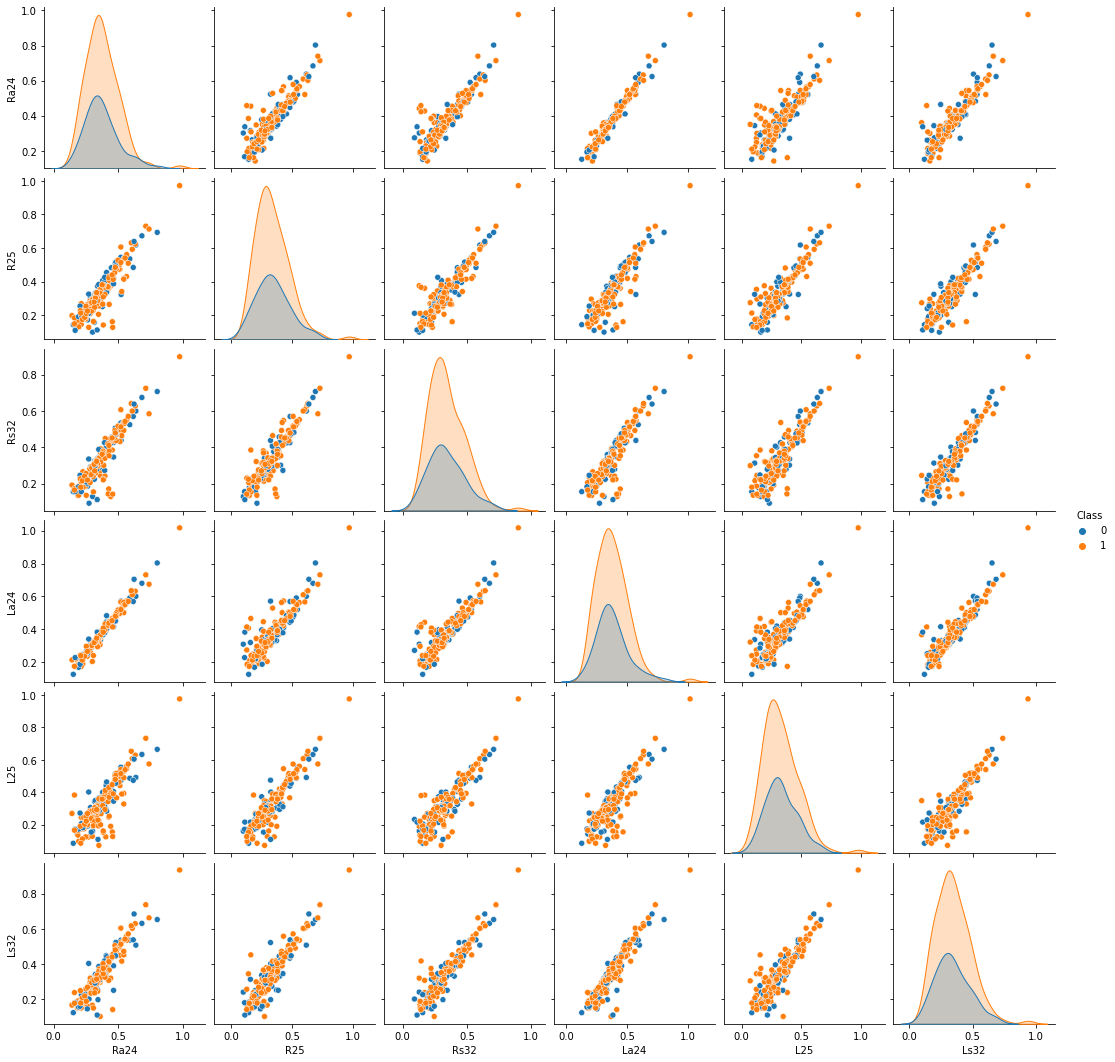

In [26]:
noi_feat_cc=np.zeros((num_noi,num_subjs))
noi_feat_cc=clus_co[[val-1 for val in nodes_of_interest.values()],:].transpose()
noi_df_cc=pd.DataFrame(noi_feat_cc,columns=[val for val in nodes_of_interest.keys()])
noi_df_cc['Class']=two_class_labels
sns.pairplot(noi_df_cc,hue='Class')

There are some really interesting patterns in the network features compared to the autoregressive features. There's very strong laterality, i.e. the left right pairs of a given node generate features that are highly co-linear.  

# Non Linear Dimensionality Reduction
Let's explore a set of data transforms to see whether if they would be helpful for classification



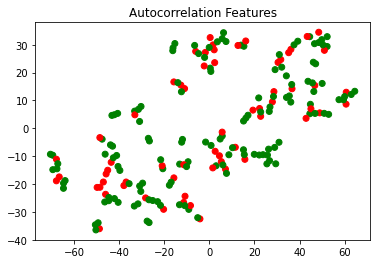

In [30]:
# do some TSNE visualization

noi_embedded=TSNE(n_components=2,perplexity=5).fit_transform(noi_features) #tried various perplexities (5,10,15,30,50,100) at perplexities higher than 5 the points seem linearly correlated with no class distinctions and at high perplexities (100) the points seem randomly distributed. 
colormap = np.array(['r', 'g','b'])

plt.scatter(noi_embedded[:,0],noi_embedded[:,1],c=colormap[two_class_labels])
plt.title('Autocorrelation Features')
plt.show()

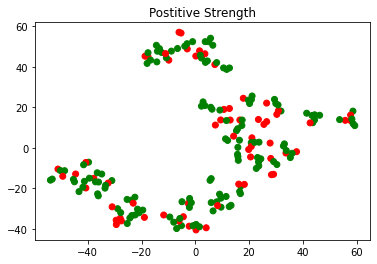

In [31]:
noi_embedded=TSNE(n_components=2,perplexity=5).fit_transform(noi_feat_pos) #tried various perplexities (5,10,15,30,50,100) at perplexities higher than 5 the points seem linearly correlated with no class distinctions and at high perplexities (100) the points seem randomly distributed. 
colormap = np.array(['r', 'g','b'])

plt.scatter(noi_embedded[:,0],noi_embedded[:,1],c=colormap[two_class_labels])
plt.title('Postitive Strength')
plt.show()

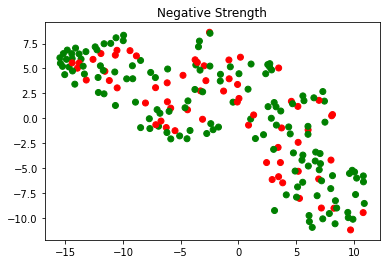

In [32]:
noi_embedded=TSNE(n_components=2,perplexity=30).fit_transform(noi_feat_neg) #tried various perplexities (5,10,15,30,50,100), seems like this is a feature set where there's a bit of hope in identifying patients

colormap = np.array(['r', 'g','b'])

plt.scatter(noi_embedded[:,0],noi_embedded[:,1],c=colormap[two_class_labels])
plt.title('Negative Strength')

plt.show()

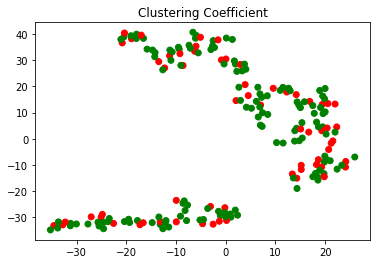

In [33]:
noi_embedded=TSNE(n_components=2,perplexity=10).fit_transform(noi_feat_cc) #tried various perplexities (5,10,15,30,50,100) at perplexities higher than 15 the points seem linearly correlated with no class distinctions and at high perplexities (100) the points seem randomly distributed. There's interesting behavior ar perp 5, there seems to be a smaller clusters of subjects but which don't match patient labels well. At perp 10, there's a two group split though it also doesn't match the group labels. 

colormap = np.array(['r', 'g','b'])

plt.scatter(noi_embedded[:,0],noi_embedded[:,1],c=colormap[two_class_labels])
plt.title('Clustering Coefficient')
plt.show()